<a href="https://colab.research.google.com/github/Mmkdstaz/kaggle/blob/main/Digimonn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install kagglehub


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rtatman/digidb")

print("Path to dataset files:", path)

100%|██████████| 14.3k/14.3k [00:00<00:00, 20.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rtatman/digidb/versions/1


In [ ]:
import os

print(os.listdir(path))


['DigiDB_movelist.csv', 'DigiDB_supportlist.csv', 'DigiDB_digimonlist.csv']


In [ ]:
import pandas as pd
import os

digimon = pd.read_csv(os.path.join(path, "DigiDB_digimonlist.csv"))
skills = pd.read_csv(os.path.join(path, "DigiDB_movelist.csv"))
support = pd.read_csv(os.path.join(path, "DigiDB_supportlist.csv"))

digimon.head()


,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


In [ ]:
skills.head()

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description,Efficiency
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95...",21.666667
1,Wolkenapalm II,6,Physical,85,Fire,Yes,"Physical attack, 85 Fire damage to one foe. 95...",14.166667
2,Wolkenapalm III,9,Physical,105,Fire,Yes,"Physical attack, 105 Fire damage to one foe. 9...",11.666667
3,Burst Flame I,3,Magic,55,Fire,Yes,"Magic attack, 55 Fire damage to one foe. 95% a...",18.333333
4,Burst Flame II,6,Magic,75,Fire,Yes,"Magic attack, 75 Fire damage to one foe. 95% a...",12.500000


In [ ]:
support.head()

,Name,Description
0,Adroit Wisdom,Increases INT by 15%.
1,All-Rounder,"Increases ATK, DEF, INT and SPD by 5%."
2,Analyze,Increases scan values by 10%.
3,Animal Colosseum,Increases damage from Earth skills by 15%.
4,Aus Generics,Increases SPD and EVA by 25% when HP drops bel...


In [ ]:
skills['Efficiency'] = skills['Power'] / skills['SP Cost']

In [ ]:
best_skills = skills[skills['SP Cost'] > 0].nlargest(10, 'Efficiency', 'all')
best_skills.head()

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description,Efficiency
80,Heavy Strike I,3,Physical,70,Neutral,Yes,"Physical attack, 70 Neutral damage to one foe....",23.333333
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95...",21.666667
10,Ice Archery I,3,Physical,65,Water,Yes,"Physical attack, 65 Water damage to one foe. 9...",21.666667
20,Crescent Leaf I,3,Physical,65,Plant,Yes,"Physical attack, 65 Plant damage to one foe. 9...",21.666667
30,Nanomachine Break I,3,Physical,65,Thunder,Yes,"Physical attack, 65 Thunder damage to one foe....",21.666667


In [ ]:
best_attack = digimon.groupby('Digimon')['Lv50 Atk'].max().sort_values(ascending=False)
best_defense = digimon.groupby('Digimon')['Lv50 Def'].max().sort_values(ascending=False)
best_attack[:3]

,Lv50 Atk
Digimon,
Chaosmon,318
Belphemon RM,247
Diaboromon,243


In [ ]:
best_defense[:3]

,Lv50 Def
Digimon,
GroundLocomon,213
Craniamon,208
Magnamon,208


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sampled_data = digimon.sample(frac=0.1, random_state=42) if len(digimon) > 1000 else digimon
sampled_data

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,245,Valkyrimon,Mega,Free,Wind,18,3,1330,139,148,129,129,168
245,246,ShineGreymon BM,Mega,Vaccine,Fire,22,2,1980,114,228,104,84,168
246,247,MirageGaogamon BM,Mega,Data,Light,20,2,1440,124,178,104,158,174
247,248,Ravemon BM,Mega,Vaccine,Wind,20,2,1040,133,149,139,144,213


In [ ]:
digimon.shape

(249, 13)

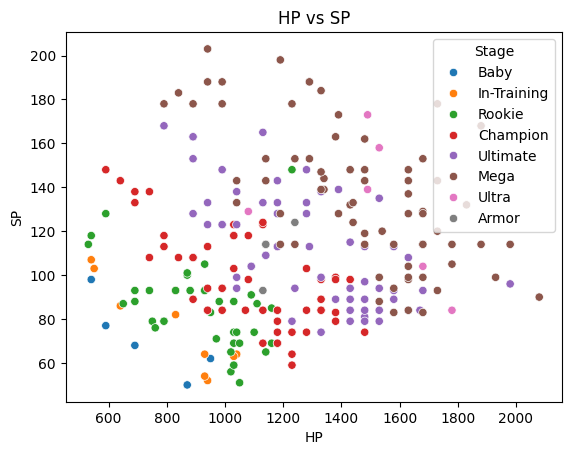

In [ ]:
sns.scatterplot(x='Lv 50 HP', y='Lv50 SP', data=sampled_data, hue = 'Stage')
plt.xlabel('HP')
plt.ylabel('SP')
plt.title('HP vs SP')
plt.show()

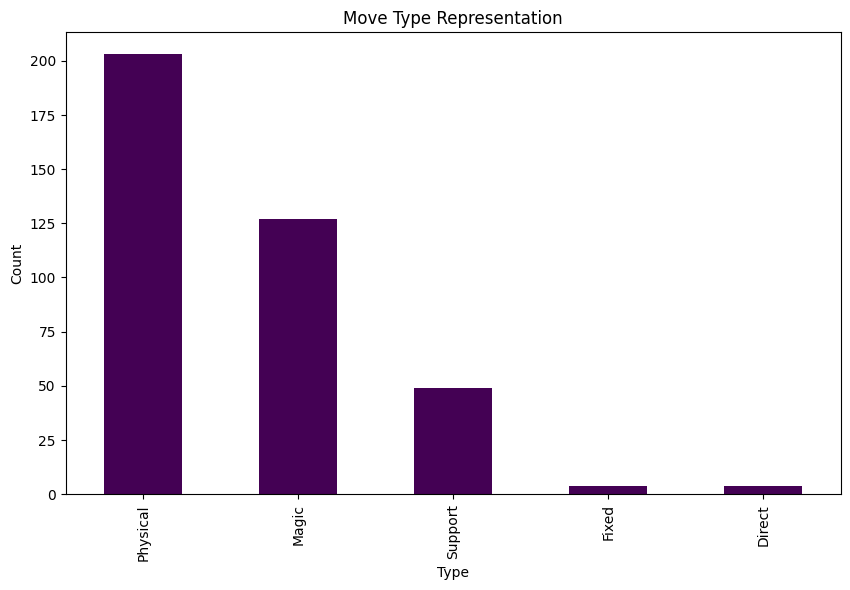

In [ ]:
type_counts = skills['Type'].value_counts()
type_counts.plot(kind='bar', figsize=(10, 6), colormap='viridis', title='Move Type Representation')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=50)
X = vectorizer.fit_transform(skills['Description'])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
skills['Moves'] = gmm.fit_predict(X.toarray())

In [ ]:
skills.head()

,Move,SP Cost,Type,Power,Attribute,Inheritable,Description,Efficiency,Moves
0,Wolkenapalm I,3,Physical,65,Fire,Yes,"Physical attack, 65 Fire damage to one foe. 95...",21.666667,1
1,Wolkenapalm II,6,Physical,85,Fire,Yes,"Physical attack, 85 Fire damage to one foe. 95...",14.166667,1
2,Wolkenapalm III,9,Physical,105,Fire,Yes,"Physical attack, 105 Fire damage to one foe. 9...",11.666667,1
3,Burst Flame I,3,Magic,55,Fire,Yes,"Magic attack, 55 Fire damage to one foe. 95% a...",18.333333,1
4,Burst Flame II,6,Magic,75,Fire,Yes,"Magic attack, 75 Fire damage to one foe. 95% a...",12.500000,1


In [ ]:
from sklearn.decomposition import PCA
x_pca = PCA(n_components=2).fit_transform(X.toarray())
x_pca

array([[-2.30082710e-01,  1.18022377e+00],
       [-2.14746561e-01,  1.15353789e+00],
       [-2.25644936e-01,  1.19616997e+00],
       [-5.11461615e-01,  1.09040108e+00],
       [-5.16828557e-01,  1.08694416e+00],
       [-7.16915908e-01,  1.32672259e+00],
       [-1.29725191e+00, -6.04701577e-02],
       [-1.39375105e+00, -3.16489824e-02],
       [-1.39983479e+00, -5.41870188e-03],
       [-1.15002100e-02,  5.36587252e-01],
       [-2.75663037e-01,  1.20237303e+00],
       [-2.60326888e-01,  1.17568715e+00],
       [-2.71225263e-01,  1.21831924e+00],
       [-5.57041941e-01,  1.11255034e+00],
       [-5.62408883e-01,  1.10909343e+00],
       [-7.62496235e-01,  1.34887186e+00],
       [-1.74360969e+00, -1.30635719e-01],
       [-1.73532962e+00, -1.02323726e-01],
       [-1.75066577e+00, -7.56378448e-02],
       [-5.70805364e-02,  5.58736514e-01],
       [-2.83165295e-01,  1.20530868e+00],
       [-2.67829146e-01,  1.17862280e+00],
       [-2.78727521e-01,  1.22125488e+00],
       [-5.

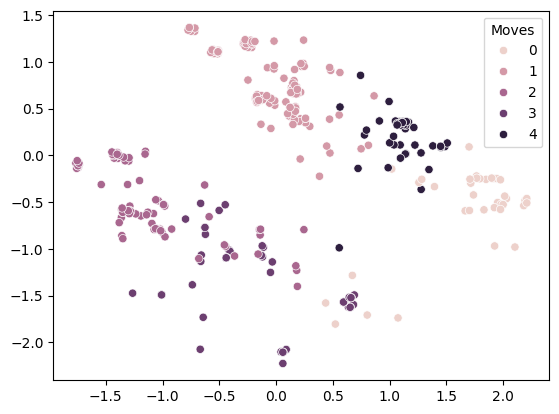

In [ ]:
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:,1], hue = skills['Moves'])
plt.show()